In [ ]:
import os

In [ ]:
# for the operating system operations e.g., creating a folder.
import os

# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Print tensorfow (TF) version. Make sure you have at least tensorflow 2.1.0
print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.12.0


In [ ]:
# import the dataset.
# from tensorflow.keras.datasets import boston_housing

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [ ]:
# Tensorflow untils packages.
!pip install  tensorflow_docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
import pathlib # for processing a path e.g., c:\documents\files\test_ds.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [ ]:
tf.random.set_seed(13) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)

In [ ]:
all_ds = pd.read_csv('/content/bioactivity_data_3class_pIC50.csv')

In [ ]:
all_ds.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
32,32,CHEMBL3120829,O=C(CO)[C@H](CCc1ccccc1)NC(=O)[C@@H]1CCCN1C(=O...,inactive,424.497,2.46660,2.0,5.0,4.301030
25,25,CHEMBL3120836,O=C(N[C@H]1CC=CC[C@H]1C(=O)N[C@@H](CCc1ccccc1)...,inactive,450.535,2.92660,3.0,5.0,4.695079
46,46,CHEMBL4555310,COC1=CC(=O)N(C(=O)/C=C/C(C)(C)NC(=O)[C@H](CC(C...,inactive,820.951,4.71040,5.0,8.0,4.301030
30,30,CHEMBL3120831,CC(=O)SCC(=O)[C@H](CCc1ccccc1)NC(=O)[C@@H]1CCC...,inactive,482.602,3.75400,1.0,6.0,4.439376
52,52,CHEMBL4471644,Cc1cc(NC(=O)Cn2nnc(-c3ccc(N)cc3)n2)no1,intermediate,299.294,0.85742,2.0,8.0,5.175874


In [ ]:
print(f'Number of rows/examples and columns in the dataset: {all_ds.shape}')

Number of rows/examples and columns in the dataset: (65, 9)


In [ ]:
columns_to_drop = ["class", "canonical_smiles", "molecule_chembl_id", "Unnamed: 0"]
all_ds1 = all_ds.drop(columns_to_drop, axis=1)

In [ ]:
all_ds1

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
32,424.497,2.46660,2.0,5.0,4.301030
25,450.535,2.92660,3.0,5.0,4.695079
46,820.951,4.71040,5.0,8.0,4.301030
30,482.602,3.75400,1.0,6.0,4.439376
52,299.294,0.85742,2.0,8.0,5.175874
...,...,...,...,...,...
19,470.591,2.85760,3.0,6.0,5.085128
50,897.049,5.93320,5.0,8.0,6.950782
51,357.411,-1.46090,5.0,5.0,6.866461
0,426.562,0.01507,6.0,5.0,7.060481


In [ ]:
# Summary of information on the dataset.
all_ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 32 to 57
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MW             65 non-null     float64
 1   LogP           65 non-null     float64
 2   NumHDonors     65 non-null     float64
 3   NumHAcceptors  65 non-null     float64
 4   pIC50          65 non-null     float64
dtypes: float64(5)
memory usage: 3.0 KB


# Cleaning the data.

In [ ]:
print("Display NA values in each columns: ")
all_ds1.isna().sum(axis=0)

Display NA values in each columns: 


MW               0
LogP             0
NumHDonors       0
NumHAcceptors    0
pIC50            0
dtype: int64

In [ ]:
print("Display NA values in each row: ")
all_ds1.isna().sum(axis=1)

Display NA values in each row: 


32    0
25    0
46    0
30    0
52    0
     ..
19    0
50    0
51    0
0     0
57    0
Length: 65, dtype: int64

In [ ]:
print("Display NULL values in each columns: ")
all_ds1.isnull().sum()

Display NULL values in each columns: 


MW               0
LogP             0
NumHDonors       0
NumHAcceptors    0
pIC50            0
dtype: int64

In [ ]:
print("Display NULL values in each row: ")
all_ds1.isnull().sum(1)

Display NULL values in each row: 


32    0
25    0
46    0
30    0
52    0
     ..
19    0
50    0
51    0
0     0
57    0
Length: 65, dtype: int64

In [ ]:
# Remove the rows with NA values.
all_ds1 = all_ds1.dropna()

# You can also use the following line to fill the NA with Zeros.
# all_ds = all_ds.fillna(0)
# all_ds = all_ds.fillna(mean_of_column)

In [ ]:
# slice the data set and keep last n rows of the dataset.  E.g., you want to save the last 20 rows from the dataset into a new dataset.
n = 65
temp_ds = all_ds1[:n]
temp_ds.shape

(65, 5)

# Sample the dataset randomly and return fraction (e.g., frac=50% will return 50% of the data) from the dataset.

In [ ]:
# all_ds[10:]
# all_ds.sample(frac=1) # this will shuffle all of the dataset and randomly re-organize the rows.

all_ds1 = all_ds1.sample(frac=1) # This will randomly shuffle the rows to make sure the data is not sorted. (if the data is sorted then we may end up with test dataset from one or two classes only)
all_ds1_90pct = all_ds1.sample(frac=0.9) # randomly sample the dataset and keep 90% of the rows.
all_ds1_90pct.shape

(58, 5)

# Split the data into train/test splits.

In [ ]:
# THis is an alternative method to split the data and replace train_test_split.
# train_dataset = all_ds_90pct.sample(frac=0.6) # This will select 80
# test_dataset = all_ds_90pct.drop(train_dataset.index)

In [ ]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(all_ds1_90pct, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(34, 5)
(24, 5)


In [ ]:
train_dataset=train_dataset.drop("pIC50",axis=1)

In [ ]:
train_dataset

In [ ]:
colomns_drop=["MW","LogP","NumHDonors","NumHAcceptors"]
temp_test_dataset=temp_test_dataset.drop(colomns_drop,axis=1)

In [ ]:
temp_test_dataset

In [ ]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(12, 1)
(12, 1)


In [ ]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset       : (34, 4)
 Test dataset       : (12, 1)
 Validation dataset : (12, 1)


In [ ]:
# Plot the relationship between each two variables to spot anything incorrect.
#train_stats = train_dataset.describe()
#train_stats.pop("pIC50")
#sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [ ]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
#train_stats = train_dataset.describe()
#train_stats.pop("pIC50")
#train_stats = train_stats.transpose()
#train_stats

# The label is "Median Value" of the house. We will remove them from each dataset split (train, test, validate) and save them into new variables.
Note: we maintain the order of the labels and data from now on to make sure each example/row is associated with the right label.

In [ ]:
#train_labels = train_dataset.pop('pIC50')
#test_labels = test_dataset.pop('pIC50')
#valid_labels = valid_dataset.pop('pIC50')

# Data Normalization/Scaling
Subtract the mean of the training data and divide by the standard deviation of the training data.

In [ ]:
# define a function to normalize the data set.
#def norm(x):
    #return (x - train_stats['mean']) / train_stats['std']
#normed_train_data = norm(train_dataset)
#normed_test_data = norm(test_dataset)
#normed_valid_dataset = norm(valid_dataset)

In [ ]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape} ')
print(f'Test Labels  : {test_labels.shape} ')
print(f'Test Labels  : {valid_labels.shape} ')

Train/Test/Validate splits: 
Train    : (34, 4) 
Test     : (12, 4) 
Validate : (12, 4) 
Train/Test/Validate labels: 
Train Labels : (34,) 
Test Labels  : (12,) 
Test Labels  : (12,) 


In [ ]:
# show a sample of the data after normalized
normed_train_data.head(10)

,MW,LogP,NumHDonors,NumHAcceptors
6,-0.976326,-0.175158,-0.870223,-1.751763
50,1.612099,1.291246,1.059402,0.931117
49,1.573820,1.470440,1.059402,0.931117
51,-0.976744,-2.633443,1.059402,-0.678611
15,-0.472372,-0.381103,-0.227015,-0.678611
41,1.564149,1.416353,1.059402,0.931117
56,-0.912320,0.294482,-2.156639,-0.142035
8,-0.813134,0.123357,-0.227015,-1.751763
20,-0.232111,-0.038268,-0.870223,0.394541
61,-0.347842,-0.129298,-0.870223,1.467693


# Build a Neural Network Model


In [ ]:
# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.

    # Input Layer with 10 Neurons
    model.add(Dense(10, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.

    model.add(Dense(50,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)


    model.add(Dense(50, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 50)


    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem

    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU.
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed

    return model

In [ ]:
model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()

Here is a summary of this model: 
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 10)                50        
                                                                 
 dense_123 (Dense)           (None, 50)                550       
                                                                 
 dense_124 (Dense)           (None, 50)                2550      
                                                                 
 dense_125 (Dense)           (None, 1)                 51        
                                                                 
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# We decalred a function for creating a model.
def build_model2_three_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.

    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.

    model.add(Dense(32,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 32)


    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)


    model.add(Dense(128, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 128)


    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem

    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU.
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed

    return model

model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

In [ ]:
# We decalred a function for creating a model.
def build_model3_five_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.

    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.

    model.add(Dense(64,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 64)


    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)


    model.add(Dense(64, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 64)


    model.add(Dense(64, Activation('relu')))                         # Hidden layer 4 => only output dimension should be designated (output dimension = # of Neurons = 64)


    model.add(Dense(64, Activation('relu')))                         # Hidden layer 5 => only output dimension should be designated (output dimension = # of Neurons = 64)


    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem

    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU.
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed

    return model

model3 = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model3.summary()

Here is a summary of this model: 
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_131 (Dense)           (None, 32)                160       
                                                                 
 dense_132 (Dense)           (None, 64)                2112      
                                                                 
 dense_133 (Dense)           (None, 64)                4160      
                                                                 
 dense_134 (Dense)           (None, 64)                4160      
                                                                 
 dense_135 (Dense)           (None, 64)                4160      
                                                                 
 dense_136 (Dense)           (None, 64)                4160      
                                                                 
 dense_137 (Dense) 

In [ ]:
# Test the model before training (this will use the initial weights.) which in fact will generate random values.
example_batch = normed_train_data[:10] # take the first 10 data points from the training data.
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 70ms/step


array([[-0.52672285],
       [-0.02570498],
       [-0.04305438],
       [-0.0391054 ],
       [-0.14494914],
       [-0.03723479],
       [-0.00985153],
       [-0.34114665],
       [ 0.09739295],
       [ 0.21683401]], dtype=float32)

# Save checkpoints during training

In [ ]:
!pip install -q pyyaml

In [ ]:
# pip install -q pyyaml h5py  # Required to save models in HDF5 format

checkpoint_path = r".C:/Users/iicte/Documents/gaya3/models.ckpt"

# Create a callback that saves the model's weights
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_loss', # or val_accuracy if you have it.
                                                 save_best_only=True, # Default false. If you don't change the file name then the output will be overritten at each step and only the last model will be saved.
                                                 save_weights_only=True, # True => model.save_weights (weights and no structure, you need JSON file for structure), False => model.save (saves weights & structure)
                                                 verbose=0,
                                                  )

# epoch

# Training the model we built above.

In [ ]:
%%time
EPOCHS = 500
batch_size = 32 # 6 iteration

model = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(),
                 ckpt_callback
                  ],

    )

Here is a summary of this model: 
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 32)                160       
                                                                 
 dense_139 (Dense)           (None, 32)                1056      
                                                                 
 dense_140 (Dense)           (None, 64)                2112      
                                                                 
 dense_141 (Dense)           (None, 128)               8320      
                                                                 
 dense_142 (Dense)           (None, 1)                 129       
                                                                 
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________



Epoch: 0, loss:30.9542,  mae:5.4774,  mape:101.2357,  mse:30.9542,  val_loss:21.6954,  val_mae:4.5467,  val_mape:92.8340,  val_mse:21.6954,  
....................................................................................................
Epoch: 100, loss:0.9338,  mae:0.7981,  mape:14.5629,  mse:0.9338,  val_loss:1.0692,  val_mae:0.7593,  val_mape:14.3085,  val_mse:1.0692,  
....................................................................................................
Epoch: 200, loss:0.3174,  mae:0.4433,  mape:8.2959,  mse:0.3174,  val_loss:1.6155,  val_mae:0.8307,  val_mape:15.5332,  val_mse:1.6155,  
....................................................................................................
Epoch: 300, loss:0.3488,  mae:0.4130,  mape:7.7725,  mse:0.3488,  val_loss:1.7919,  val_mae:0.8765,  val_mape:16.3810,  val_mse:1.7919,  
....................................................................................................
Epoch: 400, loss:0.2628,  mae:0.3728, 

In [ ]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,0.020445,0.142892,0.020445,2.786258,1.801924,0.918052,1.801924,17.452997,495
496,0.243755,0.358587,0.243755,6.601648,1.725029,0.881382,1.725029,16.574320,496
497,0.034631,0.186052,0.034631,4.325750,1.812092,0.858492,1.812092,15.727130,497
498,0.253164,0.351314,0.253164,6.208752,1.762033,0.862501,1.762033,16.062874,498
499,0.006910,0.060765,0.006910,1.412791,1.780318,0.850331,1.780318,15.692248,499


In [ ]:
# normed_train_data.pop('medv')
# Test the model after training.
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

1/1 [==============================] - 0s 75ms/step
predicted values: 


array([[4.115086 ],
       [6.4234796],
       [6.405483 ],
       [6.425938 ],
       [4.812445 ],
       [6.4096785],
       [5.073626 ],
       [4.296496 ],
       [4.597487 ],
       [5.113134 ]], dtype=float32)

In [ ]:
print('The ground truth: ')
train_labels[:10]

The ground truth: 


6     4.301030
50    6.950782
49    5.589898
51    6.866461
15    4.594483
41    6.338187
56    5.175874
8     4.301030
20    4.301030
61    5.175874
Name: pIC50, dtype: float64

In [ ]:
# normed_train_data.pop('medv')
# Test the model after training.
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

1/1 [==============================] - 0s 41ms/step
predicted values: 


array([[6.2473645],
       [4.911574 ],
       [4.4972963],
       [4.3781123],
       [4.3619556],
       [4.5495377],
       [5.0207267],
       [4.9356656],
       [6.4262776],
       [6.240745 ]], dtype=float32)

In [ ]:
print('The ground truth: ')
test_labels[:10]

The ground truth: 


36    7.102373
24    4.621602
13    6.283997
22    4.301030
23    4.301030
11    4.301030
55    5.175874
62    5.175874
40    5.056110
37    6.070070
Name: pIC50, dtype: float64

# See how the training went by plotting the loss/mse across epochs

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [pIC50]')

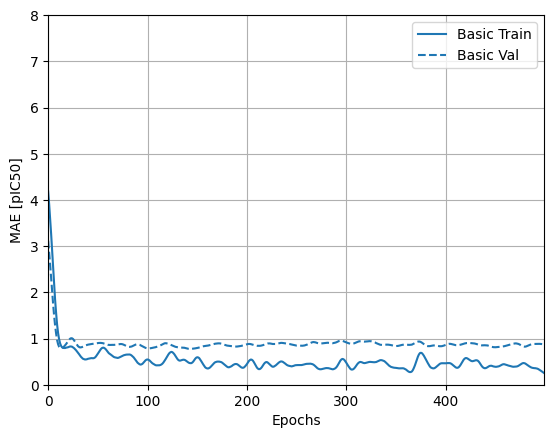

In [ ]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 8])
plt.ylabel('MAE [pIC50]')

Text(0, 0.5, 'MSE [pIC50^2]')

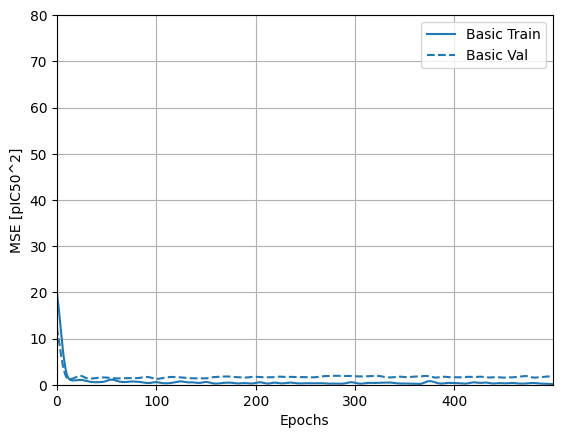

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 80])
plt.ylabel('MSE [pIC50^2]')

In [ ]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model.evaluate(normed_train_data, train_labels, verbose=2)

print("Train set Mean Abs Error    : {:5.2f} pIC50".format(mae))
print("Train set Mean Squared Error: {:5.2f} pIC50".format(mse))

Error Rate on Train Split: 
2/2 - 0s - loss: 0.2214 - mae: 0.3244 - mse: 0.2214 - mape: 5.8391 - 28ms/epoch - 14ms/step
Train set Mean Abs Error    :  0.32 pIC50
Train set Mean Squared Error:  0.22 pIC50


In [ ]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse, mape = model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Validation set Mean Abs Error    : {:5.2f} pIC50".format(mae))
print("Validation set Mean Squared Error: {:5.2f} pIC50".format(mse))

Error Rate on Evaluation Split: 
1/1 - 0s - loss: 1.7803 - mae: 0.8503 - mse: 1.7803 - mape: 15.6922 - 39ms/epoch - 39ms/step
Validation set Mean Abs Error    :  0.85 pIC50
Validation set Mean Squared Error:  1.78 pIC50


In [ ]:
print('Error Rate on Test Split: ')
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error    : {:5.2f} pIC50".format(mae))
print("Testing set Mean Squared Error: {:5.2f} pIC50".format(mse))

Error Rate on Test Split: 
1/1 - 0s - loss: 0.5071 - mae: 0.4502 - mse: 0.5071 - mape: 8.0109 - 26ms/epoch - 26ms/step
Testing set Mean Abs Error    :  0.45 pIC50
Testing set Mean Squared Error:  0.51 pIC50


2/2 [==============================] - 0s 7ms/step


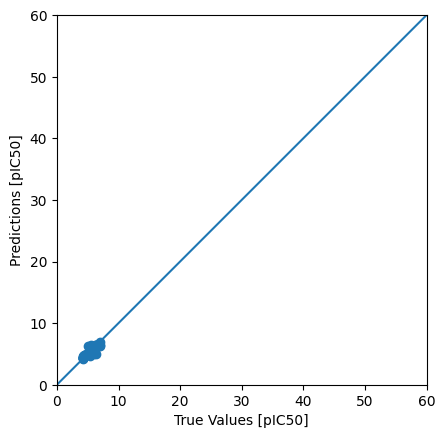

In [ ]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [pIC50]')
plt.ylabel('Predictions [pIC50]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

1/1 [==============================] - 0s 24ms/step


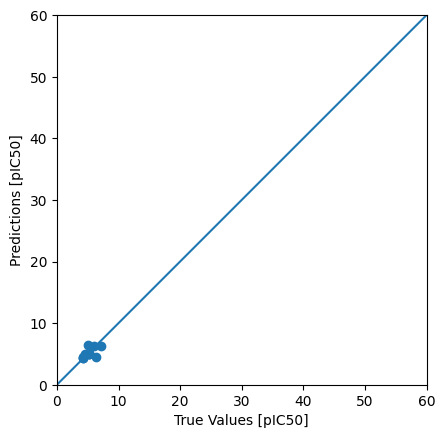

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [pIC50]')
plt.ylabel('Predictions [pIC50]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

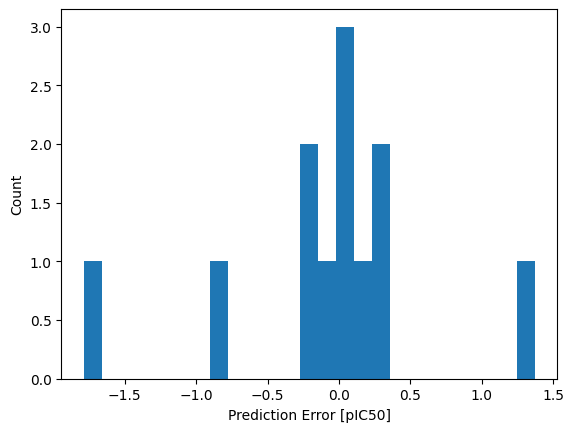

In [ ]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [pIC50]")
_ = plt.ylabel("Count")

# Save and load the model (weights)

In [ ]:
# a. Manually save weights only (no structure will be saved)
#################################

# Save the weights
model.save_weights('.C:/Users/iicte/Documents/gaya3/models.ckpt')

# Create a new model instance
model = build_model2_three_hidden_layers()

# Restore the weights
model.load_weights('.C:/Users/iicte/Documents/gaya3/models.ckpt')

# Evaluate the model
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} pIC50".format(mae))

1/1 - 0s - loss: 0.5071 - mae: 0.4502 - mse: 0.5071 - mape: 8.0109 - 286ms/epoch - 286ms/step
Testing set Mean Abs Error:  0.45 pIC50
